<div style="border:solid Chocolate 2px; padding: 40px">

<b>Михаил, привет!👋</b>

Меня зовут Ольга Бессолицына, тимлид, я буду проверять эту (как наверное и все) части твоего проекта. 

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий тимлида <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>

# Финальный проект "Телеком"

__Содержание__
- [Описание проекта](#Описание-проекта)
- [План](#План)
- [Код](#Код)
   - [Предварительная обработка](#Предварительная-обработка)
   - [EDA](#EDA)
   - [Моделирование](#Моделирование)
   - [Тестирование](#Тестирование)
- [Отчёт](#Отчёт)

## Описание проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

__Описание услуг__  
Оператор предоставляет два основных типа услуг:
1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. _digital subscriber line_, «цифровая абонентская линия») или оптоволоконный кабель (_Fiber optic_).

Также доступны такие услуги:
- Интернет-безопасность: антивирус (`DeviceProtection`) и блокировка небезопасных сайтов (`OnlineSecurity`);
- Выделенная линия технической поддержки (`TechSupport`);
- Облачное хранилище файлов для резервного копирования данных (`OnlineBackup`);
- Стриминговое телевидение (`StreamingTV`) и каталог фильмов (`StreamingMovies`).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

__Описание данных__  
Данные состоят из файлов, полученных из разных источников:
- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

__Описание полей в данных__
- `BeginDate` – дата начала пользования услугами,
- `EndDate` – дата окончания пользования услугами,
- `Type` – тип договора: ежемесячный, годовой и т.д,
- `PaperlessBilling` – факт выставления счёта на электронную почту,
- `PaymentMethod` – способ оплаты,
- `MonthlyCharges` – ежемесячные траты на услуги,
- `TotalCharges` – всего потрачено денег на услуги,
- `Dependents` – наличие иждивенцев,
- `SeniorCitizen` – наличие пенсионного статуса по возрасту,
- `Partner` – наличие супруга(и),
- `MultipleLines` – наличие возможности ведения параллельных линий во время звонка.

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
 Молодец, что не забываешь про заголовок и описание, это важно, так и самому удобнее работать, когда они всегда на виду, так и другим будет проще понять, что происходит в твоей тетради :)
</div>

## План

- Предварительная обработка данных
- Исследовательский анализ данных
- Моделирование
- Тестирование
- Формирование отчёта

<div class="alert alert-warning">
    <h2> Комментарий тимлида <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> по плану - ок, но можно расписать подробнее, что входит в эти этапы?

In [73]:
import os
from typing import Optional

import catboost
import lightgbm
import matplotlib.pyplot as plt
import numpy as np
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)
import pandas as pd
from scipy import stats
import seaborn as sns
import shap

from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

In [2]:
RANDOM_STATE = 100423

In [3]:
def violinplot_denshist_ttest(
    df: pd.DataFrame,
    feature: str,
    target: str,
) -> None:
    """
    Визуализирует разницу в распределениях численного непрерывного признака для разных целевых
    классов.
    """
    df = df[[feature, target]].copy()
    if df[feature].dtype != 'float':
        df[feature] = df[feature].astype('float')

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    # Violinplot
    sns.violinplot(
        data=df,
        x=target,
        y=feature,
        ax=axes[0],
    )
    axes[0].set_title('violinplot')
    # Density Histogram
    sns.histplot(
        data=df,
        x=feature,
        hue=target,
        bins=50,
        stat='density',
        common_norm=False,
        ax=axes[1],
    )
    axes[1].set_title('Density Histogram')

    plt.show()

    print('t-критерий Стьюдента')
    labels = df[target].unique()
    results = stats.ttest_ind(
        df.loc[(df[target] == labels[0]) & df[feature].notna(), feature],
        df.loc[(df[target] == labels[1]) & df[feature].notna(), feature],
    )
    print(f'p-значение: {results.pvalue}')
    if results.pvalue < 0.05:
        print('Выборки различимы')
    else:
        print('Выборки не различимы')


def plot_pies(
        df: pd.DataFrame,
        feature: str,
        target: str,
        *,
        rows_num: Optional[int] = None,
        cols_num: Optional[int] = None,
) -> None:
    """
    Визуализирует распределение значений признака в виде круговой диаграммы.

    Args:
        df: DataFrame, из которого будет вытаскиваться распределение.
        feature: признак, для которого визуализируется распределение ответов.
        target: название столбца с целевой переменной.
        rows_num: количество строчек на рисунке.
        cols_num: количество столбцов на рисунке.
    """
    df = df[[feature, target]].copy()

    has_na = df[feature].isna().any()  # флаг наличия пропусков
    # формируем отсортированный список значений признака
    if has_na:
        values = sorted(df.dropna()[feature].unique())
    else:
        values = sorted(df[feature].unique())
    # формируем отсортированный список меток
    labels = sorted(df[target].unique())

    if rows_num is None or cols_num is None:
        rows_num = 1
        cols_num = len(labels) + 1

    fig, axes = plt.subplots(rows_num, cols_num, figsize=(24, 5))
    axes = axes.flat
    fig.suptitle(feature, fontsize=16)
    # отдельные пироги по классам
    for label, ax in zip(labels, axes[:len(labels)]):
        ax.set_title(label)
        label_df = df[df[target] == label]
        sizes = [(label_df[feature] == value).sum() for value in values]
        if has_na:
            na_num = label_df[feature].isna().sum()
            sizes.append(na_num)
        ax.pie(sizes, autopct='%1.1f%%')
    # пирог для всего датасета
    axes[-1].set_title('целый датасет')
    sizes = [(df[feature] == value).sum() for value in values]
    if has_na:
        na_num = df[feature].isna().sum()
        sizes.append(na_num)
        values.append('NaN')
    wedges, _, _ = axes[-1].pie(sizes, autopct='%1.1f%%')
    axes[-1].legend(wedges, values, bbox_to_anchor=(1, 0, 0.5, 1))

    plt.show()

In [4]:
try:
    contract_df = pd.read_csv(os.path.join('datasets', 'final_provider', 'contract.csv'))
    personal_df = pd.read_csv(os.path.join('datasets', 'final_provider', 'personal.csv'))
    internet_df = pd.read_csv(os.path.join('datasets', 'final_provider', 'internet.csv'))
    phone_df = pd.read_csv(os.path.join('datasets', 'final_provider', 'phone.csv'))
except:
    contract_df = pd.read_csv(os.path.join('/datasets', 'final_provider', 'contract.csv'))
    personal_df = pd.read_csv(os.path.join('/datasets', 'final_provider', 'personal.csv'))
    internet_df = pd.read_csv(os.path.join('/datasets', 'final_provider', 'internet.csv'))
    phone_df = pd.read_csv(os.path.join('/datasets', 'final_provider', 'phone.csv'))

<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> ошибка в загрузке данных, не хватает слэша перед указанием директории

<div class="alert" style="background-color: #ead7f7; color: #8737bf">
<font size="3"><b>Комментарий студента</b></font>
    
эм ...
    
А почему он здесь должен быть? Я выполняю проект локально на своём ПК (кстати, как сказано в задании), я задаю путь относительный. Вы запускаете тетрадку скорее всего в облачке с UNIX-подобной системой, где путь указывается абсолютный.
    
В чём проблема то?
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида 2<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> помни про общие договоренности в начале курса - оформление с пояснениями, использование markdown ячеек и то что код должен работать на платформе, если хочешь сохранить оба пути, то можно сделать через try-except, можно так:
    
`try:
    contract = pd.read_csv('contract_new.csv')
    personal = pd.read_csv('personal_new.csv')
    internet = pd.read_csv('internet_new.csv')    
    phone = pd.read_csv('phone_new.csv')
except:
    contract = pd.read_csv('/datasets/contract_new.csv')
    persona = pd.read_csv('/datasets/personal_new.csv')
    internet = pd.read_csv('/datasets/internet_new.csv')    
    phone = pd.read_csv('/datasets/phone_new.csv')`

<div class="alert" style="background-color: #ead7f7; color: #8737bf">
<font size="3"><b>Комментарий студента</b></font>
    
ок
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида 3<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> доработано

__contract__

In [5]:
contract_df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [6]:
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [7]:
contract_df['customerID'].nunique()

7043

In [8]:
pd.to_datetime(contract_df['BeginDate']).head()  # отлично, переводится без проблем

0   2020-01-01
1   2017-04-01
2   2019-10-01
3   2016-05-01
4   2019-09-01
Name: BeginDate, dtype: datetime64[ns]

In [9]:
pd.to_datetime(contract_df.loc[contract_df['EndDate'] != 'No', 'EndDate']).head()  # отлично, переводится без проблем

2    2019-12-01
4    2019-11-01
5    2019-11-01
8    2019-11-01
13   2019-10-01
Name: EndDate, dtype: datetime64[ns]

In [10]:
contract_df['Type'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [11]:
contract_df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
contract_df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

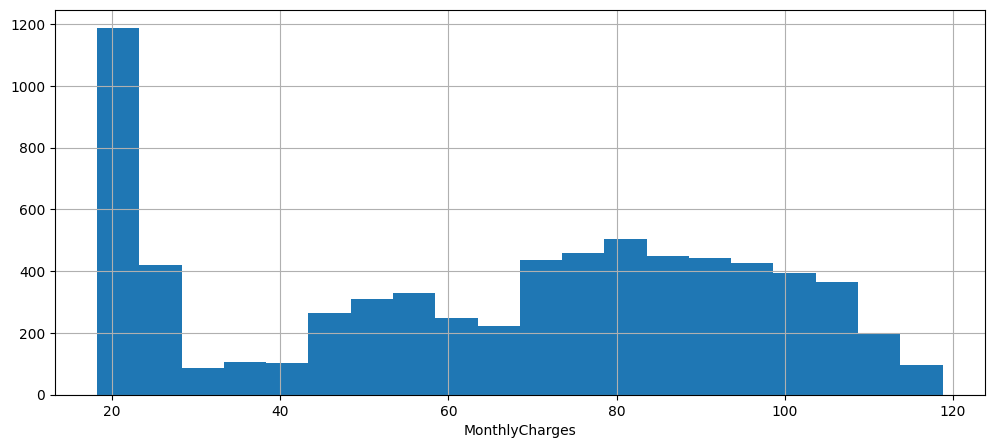

In [13]:
fig, ax = plt.subplots(figsize=(12, 5))

contract_df['MonthlyCharges'].hist(bins=20, ax=ax)
ax.set_xlabel('MonthlyCharges')

plt.show()

In [14]:
contract_df.loc[contract_df['TotalCharges'] != ' ', 'TotalCharges'].astype('float').head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [15]:
contract_df.loc[contract_df['TotalCharges'] == ' ', 'TotalCharges']  # эти примеры можно и откинуть

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

__Вывод:__
- Данные в табличке `contract` содержат 8 полей
- Поле `customerID` содержит уникальные ID клиентов
- Поля `BeginDate` и `EndDate` содержат даты. `EndDate` также может принимать значение `No`
- Поля `Type`, `PaperlessBilling` и `PaymentMethod` являются категориальными. `PaymentMethod` даже бинарный
- Поля `MonthlyCharges` и `TotalCharges` являются численными непрерывными. `TotalCharges` имеет несколько значений "пробелов", которые можно откинуть.

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> согласна

__personal__

In [16]:
personal_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [17]:
personal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [18]:
personal_df['customerID'].nunique()

7043

In [19]:
personal_df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [20]:
personal_df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [21]:
personal_df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [22]:
personal_df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

__Вывод:__
- Данные в табличке `personal` содержат 4 поля
- Поле `customerID` содержит уникальные ID клиентов
- Остальные поля являются бинарными.

__internet__

In [23]:
internet_df.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [24]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [25]:
internet_df['customerID'].nunique()

5517

In [26]:
internet_df['InternetService'].unique()

array(['DSL', 'Fiber optic'], dtype=object)

In [27]:
internet_df['OnlineSecurity'].unique()

array(['No', 'Yes'], dtype=object)

In [28]:
internet_df['OnlineBackup'].unique()

array(['Yes', 'No'], dtype=object)

In [29]:
internet_df['DeviceProtection'].unique()

array(['No', 'Yes'], dtype=object)

In [30]:
internet_df['TechSupport'].unique()

array(['No', 'Yes'], dtype=object)

In [31]:
internet_df['StreamingTV'].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
internet_df['StreamingMovies'].unique()

array(['No', 'Yes'], dtype=object)

__Вывод:__
- Данные в табличке `internet` содержат 8 полей
- Поле `customerID` содержит уникальные ID клиентов
- Остальные поля являются бинарными, кроме `InternetService`. Он имеет 3 значения

__phone__

In [33]:
phone_df.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [34]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [35]:
phone_df['customerID'].nunique()

6361

In [36]:
phone_df['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

__Вывод:__
- Данные в табличке `phone` содержат всего 2 поля
- Поле `customerID` содержит уникальные ID клиентов
- Второе поле `MultipleLines` бинарно

<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> очень на хватает вывода

<div class="alert" style="background-color: #ead7f7; color: #8737bf">
<font size="3"><b>Комментарий студента</b></font>
    
Добавил вывод
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида 2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> доработано

### Вопросы:

1. Странная гистограмма у `MonthlyCharges`: много малых значений. Это нормально?
2. В отличие от остальных признаков `SeniorCitizen` закодирован [0, 1]. Верно понимаю, что 1 - пенсионер, 0 - нет?

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
1) MonthlyCharges - это ежемесячные траты, малые значения - это скорее всего из-за того, что многие выбират самый дешевый тариф

2) Верно: 1 - пенсионер, 0 - нет

<div style="border:solid Chocolate 2px; padding: 40px">

<h2>✔️ Заключение тимлида: <a class="tocSkip"> </h2> 
    
<b>Михаил</b>, работа почти готова, но нужно еще немного дорабоать, мои комментарии ты увидишь выше.

Жду твою работу! :)

<div style="border:solid Chocolate 2px; padding: 40px">

<h2>✔️ Заключение тимлида 2: <a class="tocSkip"> </h2> 
    
<b>Михаил</b>, по плану -принято, можно приступать ко второй части. Но для зачета след итерации нужно исправить ошибку с загрузкой файлов. Обрати внимание, что для следующей части нужно загрузить уже сделанную часть проекта со всеми комментариями и после этого продолжить писать работу. В итоге у нас получиться большой блокнот со всей историей проекта.

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Михаил, привет! Начинаю проверять с этой ячейки кода, версии комментариев обнуляю

## Код

### Предварительная обработка

In [37]:
# дропаем проблемные строчки
contract_df = contract_df[contract_df['TotalCharges'] != ' ']
contract_df['TotalCharges'] = contract_df['TotalCharges'].astype('float')

# формируем целевую переменную
contract_df['target'] = contract_df['EndDate'].apply(lambda x: 0 if x == 'No' else 1)

# формируем признак продолжительности контракта
contract_df['EndDate'] = contract_df['EndDate'].replace({'No': '2020-02-01'})
contract_df['EndDate'] = pd.to_datetime(contract_df['EndDate'])
contract_df['BeginDate'] = pd.to_datetime(contract_df['BeginDate'])
contract_df['duration'] = (contract_df['EndDate'] - contract_df['BeginDate']).dt.days
contract_df = contract_df.drop(columns=['BeginDate', 'EndDate'])

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хорошо, по проблемным строчкам - согласна, можно удалить
    
----

таргет выделен верно

----

и есть новый синтетический признак

In [38]:
#
personal_df['SeniorCitizen'] = personal_df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

In [39]:
# собираем всё вместе
data = contract_df.merge(personal_df, how='left', on='customerID')
data = data.merge(internet_df, how='left', on='customerID')
data = data.merge(phone_df, how='left', on='customerID')
data = data.set_index('customerID')

# заполним пропуски заглушкой для CatBoost
data = data.fillna('пропуск')

# приведём колонки к категориальному типу для LightGBM
# # из contract
# data['Type'] = data['Type'].astype('category')
# data['PaperlessBilling'] = data['PaperlessBilling'].astype('category')
# data['PaymentMethod'] = data['PaymentMethod'].astype('category')
# # из personal
# data['gender'] = data['gender'].astype('category')
# data['SeniorCitizen'] = data['SeniorCitizen'].astype('category')
# data['Partner'] = data['Partner'].astype('category')
# data['Dependents'] = data['Dependents'].astype('category')
# # из internet
# data['InternetService'] = data['InternetService'].astype('category')
# data['OnlineSecurity'] = data['OnlineSecurity'].astype('category')
# data['OnlineBackup'] = data['OnlineBackup'].astype('category')
# data['DeviceProtection'] = data['DeviceProtection'].astype('category')
# data['TechSupport'] = data['TechSupport'].astype('category')
# data['StreamingTV'] = data['StreamingTV'].astype('category')
# data['StreamingMovies'] = data['StreamingMovies'].astype('category')
# # из phone
# data['MultipleLines'] = data['MultipleLines'].astype('category')
data[data.select_dtypes(['object']).columns] = data.select_dtypes(['object']).apply(lambda x: x.astype('category'))

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Type              7032 non-null   category
 1   PaperlessBilling  7032 non-null   category
 2   PaymentMethod     7032 non-null   category
 3   MonthlyCharges    7032 non-null   float64 
 4   TotalCharges      7032 non-null   float64 
 5   target            7032 non-null   int64   
 6   duration          7032 non-null   int64   
 7   gender            7032 non-null   category
 8   SeniorCitizen     7032 non-null   category
 9   Partner           7032 non-null   category
 10  Dependents        7032 non-null   category
 11  InternetService   7032 non-null   category
 12  OnlineSecurity    7032 non-null   category
 13  OnlineBackup      7032 non-null   category
 14  DeviceProtection  7032 non-null   category
 15  TechSupport       7032 non-null   category
 16  StreamingTV   

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хорошо, но тк однотипные действия, то проше сделать по такому примеру `df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))` , или через цикл

### EDA

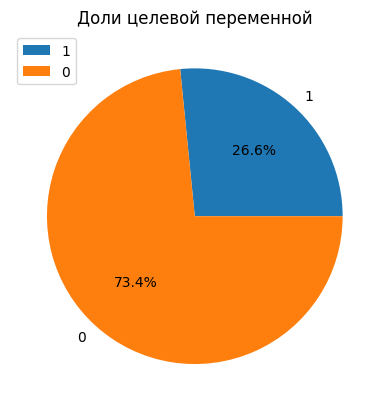

In [40]:
fig, ax = plt.subplots()

ax.pie([data['target'].mean(), 1 - data['target'].mean()], labels=['1', '0'], autopct='%1.1f%%')
ax.legend()
ax.set_title('Доли целевой переменной')

plt.show()

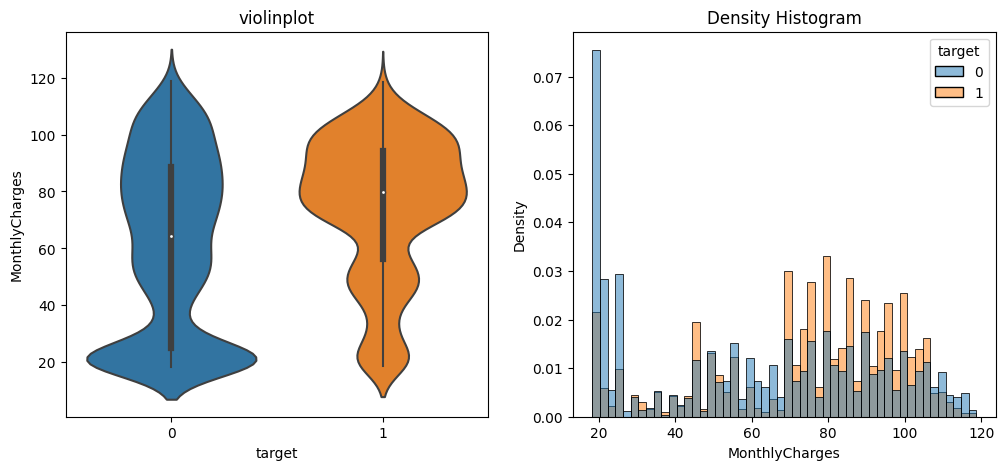

t-критерий Стьюдента
p-значение: 6.760843117980302e-60
Выборки различимы


In [41]:
violinplot_denshist_ttest(data, 'MonthlyCharges', 'target')

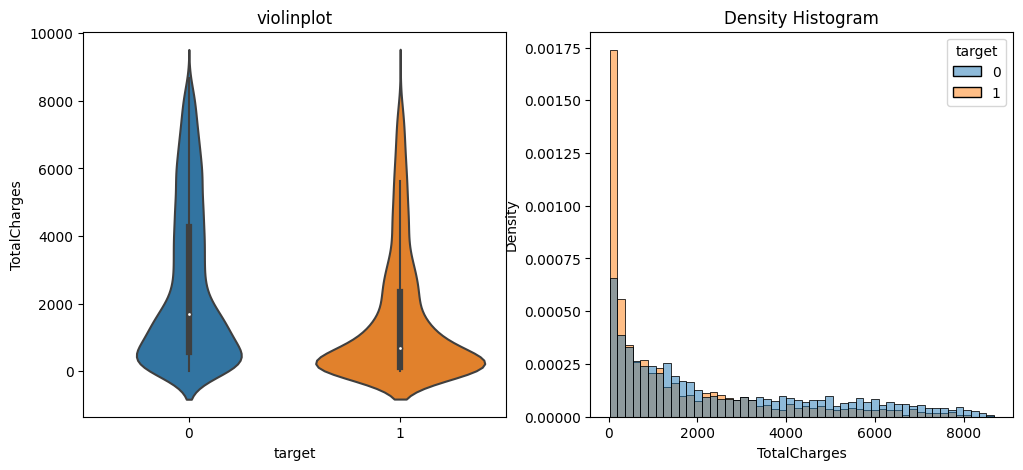

t-критерий Стьюдента
p-значение: 4.876865689694506e-64
Выборки различимы


In [42]:
violinplot_denshist_ttest(data, 'TotalCharges', 'target')

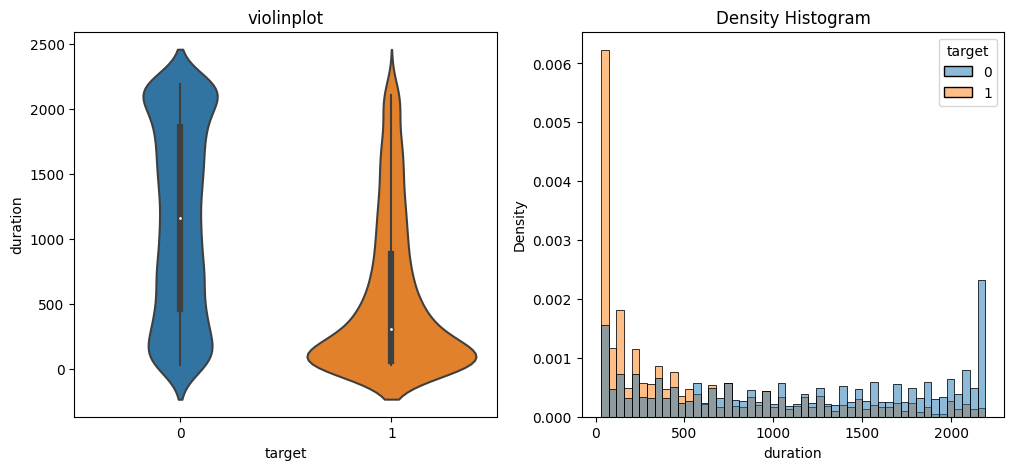

t-критерий Стьюдента
p-значение: 2.6423208080919804e-207
Выборки различимы


In [43]:
violinplot_denshist_ttest(data, 'duration', 'target')

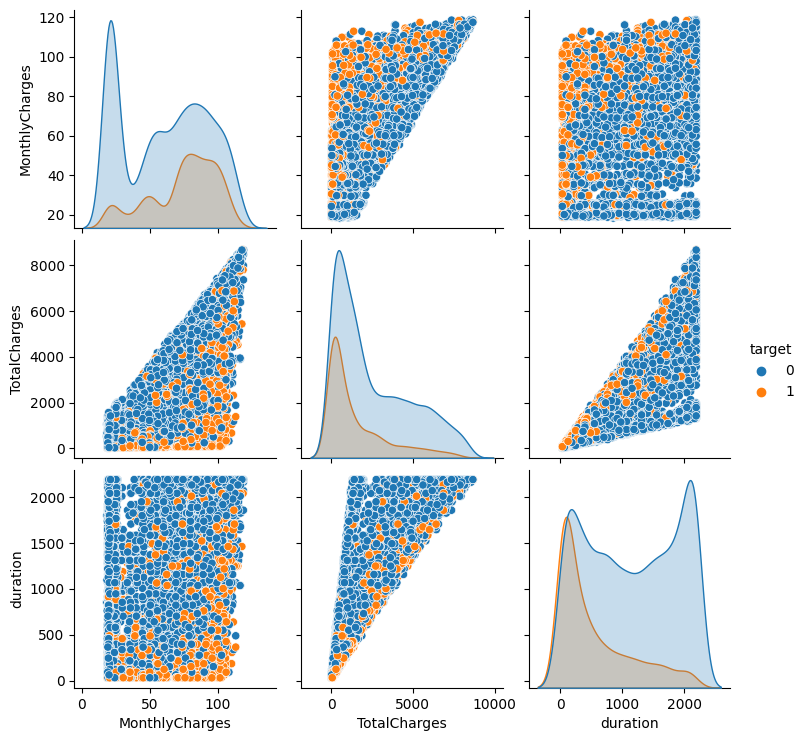

In [44]:
num_features = ['MonthlyCharges', 'TotalCharges', 'duration', 'target']
ax = sns.pairplot(data[num_features], hue='target')

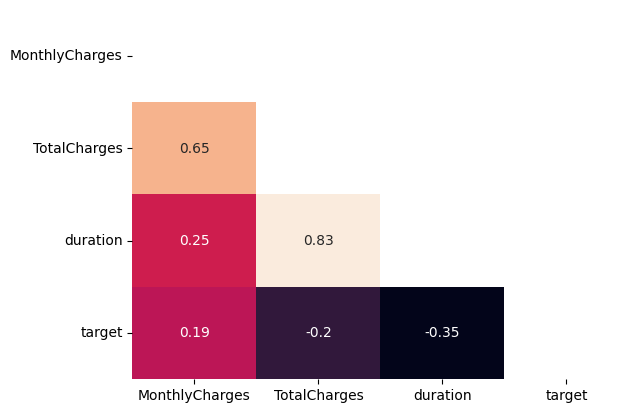

In [45]:
fig, ax = plt.subplots()
sns.heatmap(
    data[num_features].corr(method='pearson'),
    mask=np.triu(np.ones_like(data[num_features].corr(), dtype=bool)),
    annot=True,
    cbar=False,
)
plt.show()

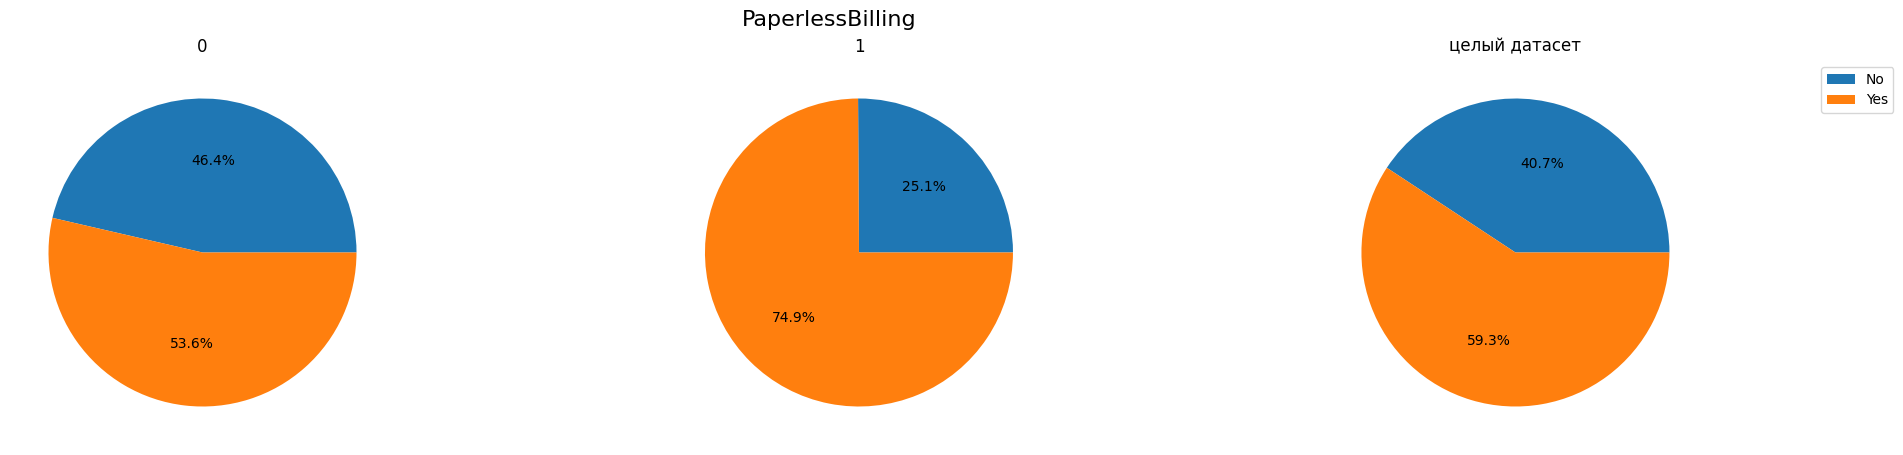

In [46]:
plot_pies(data, 'PaperlessBilling', 'target')

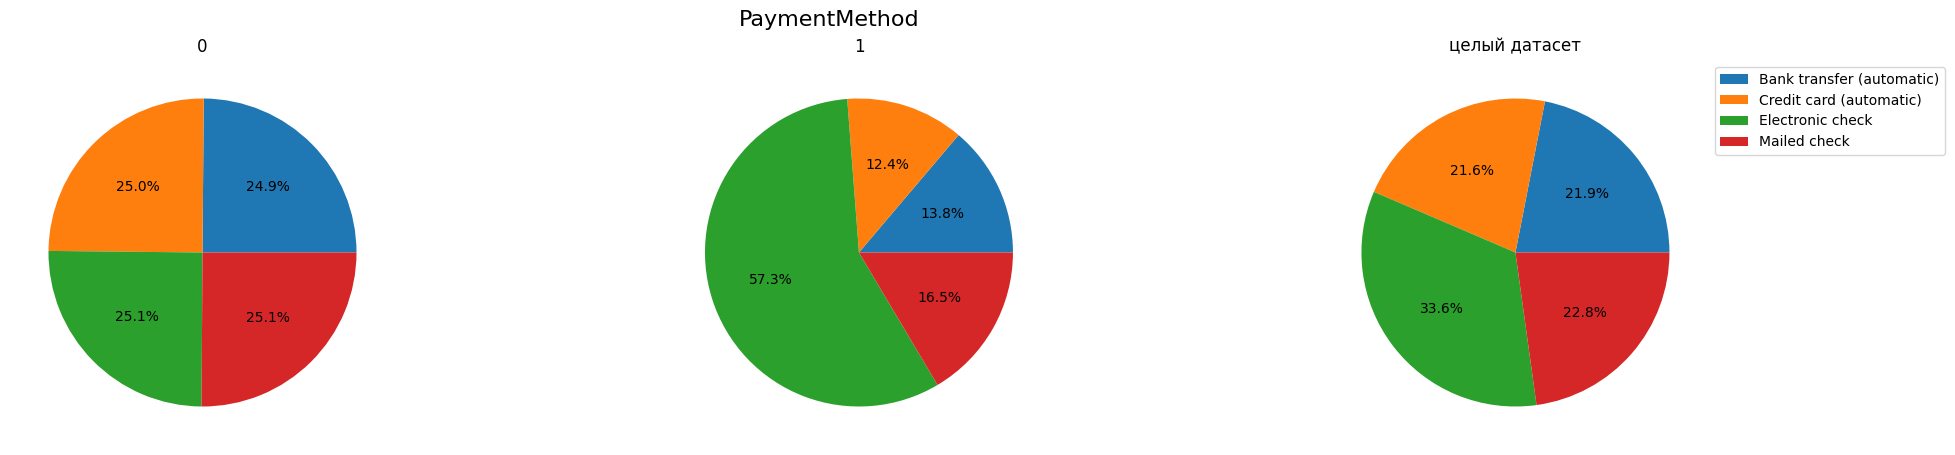

In [47]:
plot_pies(data, 'PaymentMethod', 'target')

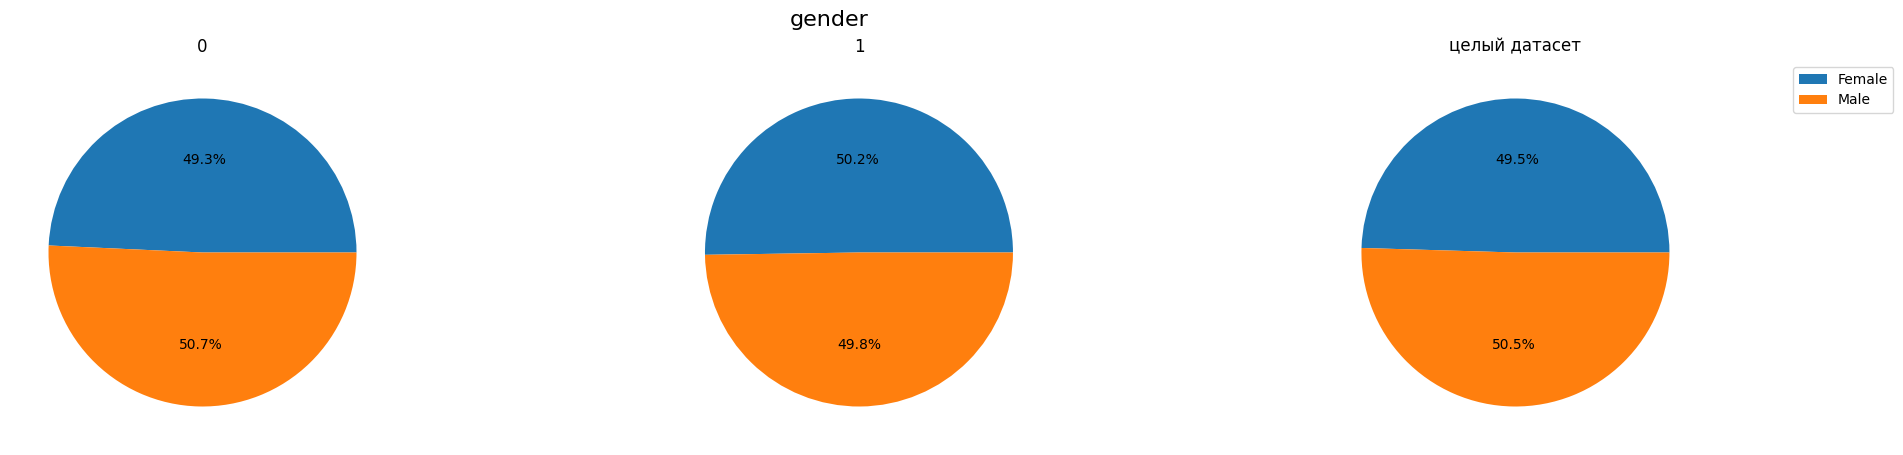

In [48]:
plot_pies(data, 'gender', 'target')

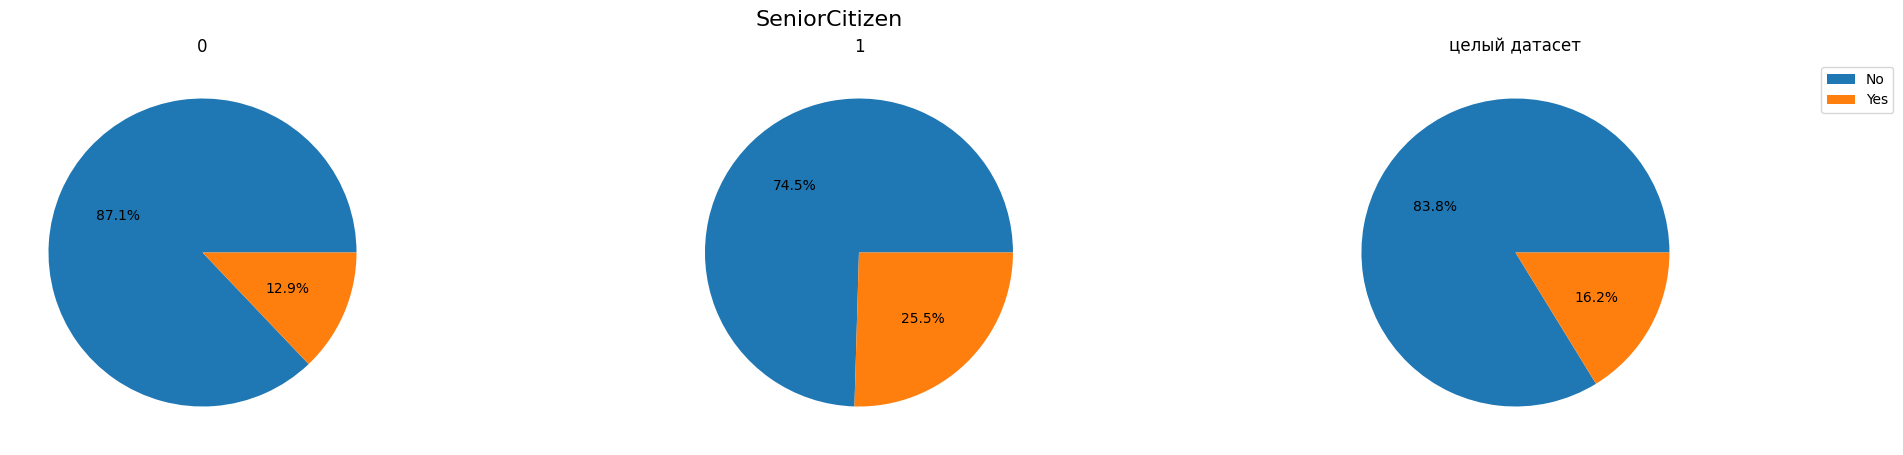

In [49]:
plot_pies(data, 'SeniorCitizen', 'target')

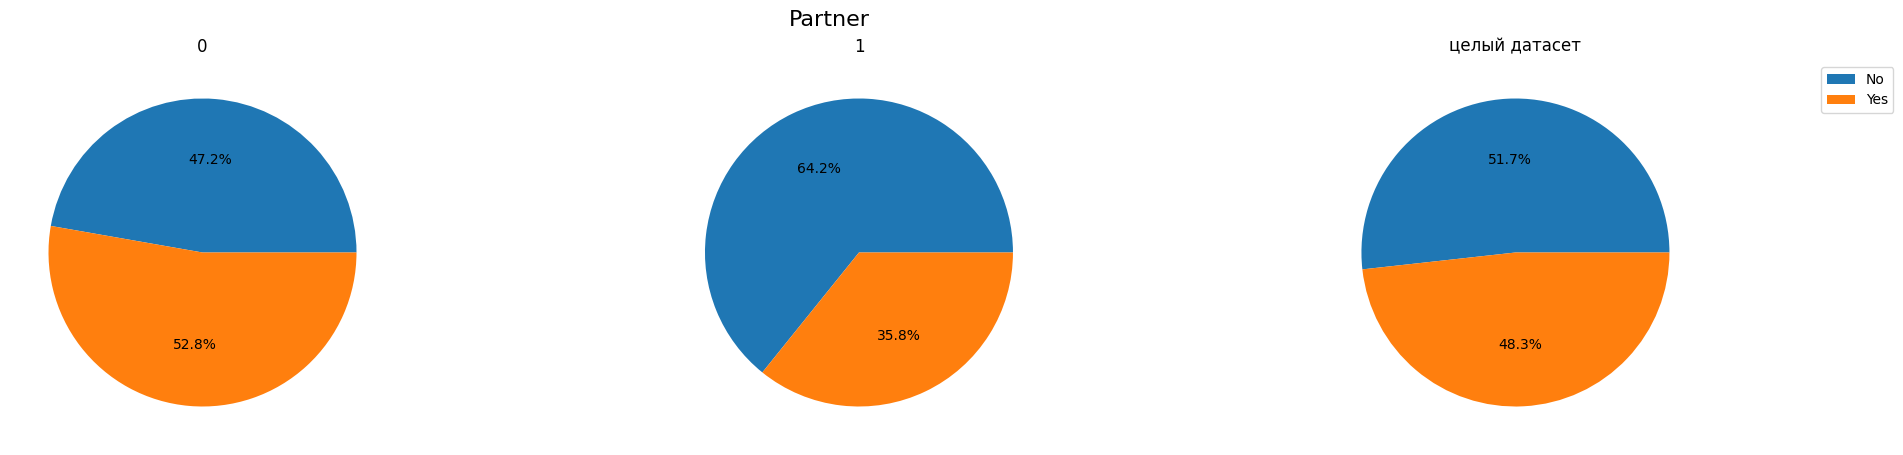

In [50]:
plot_pies(data, 'Partner', 'target')

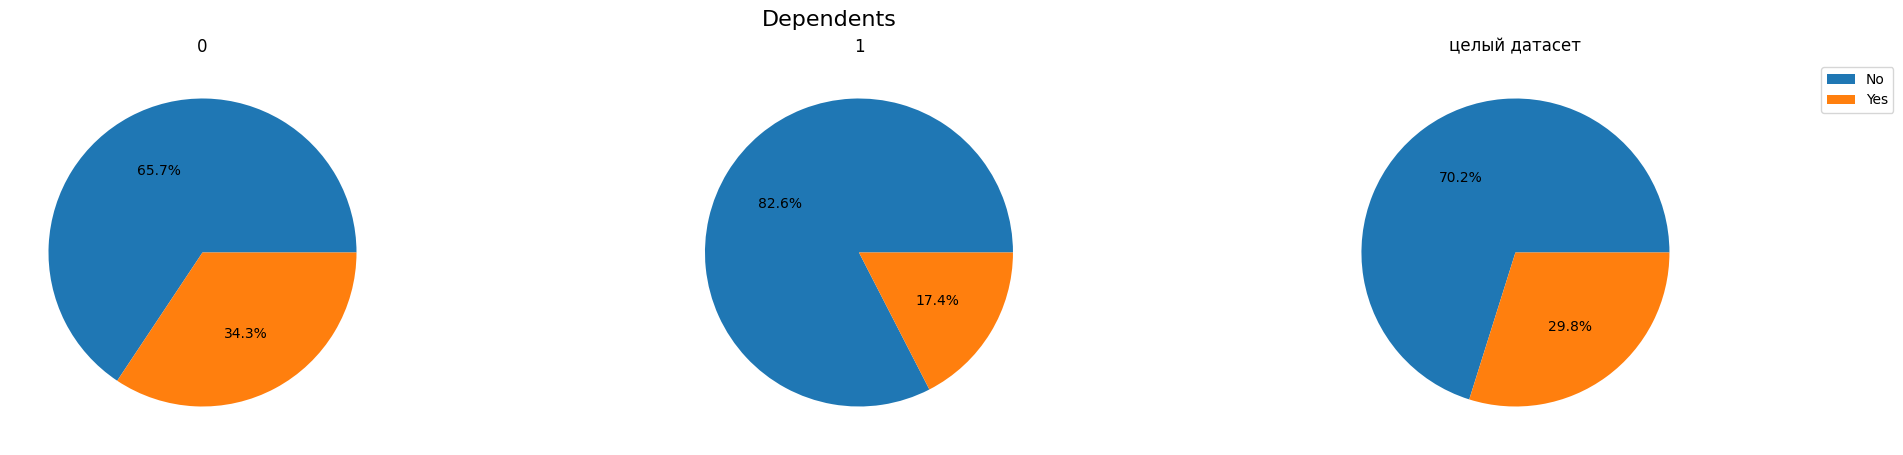

In [51]:
plot_pies(data, 'Dependents', 'target')

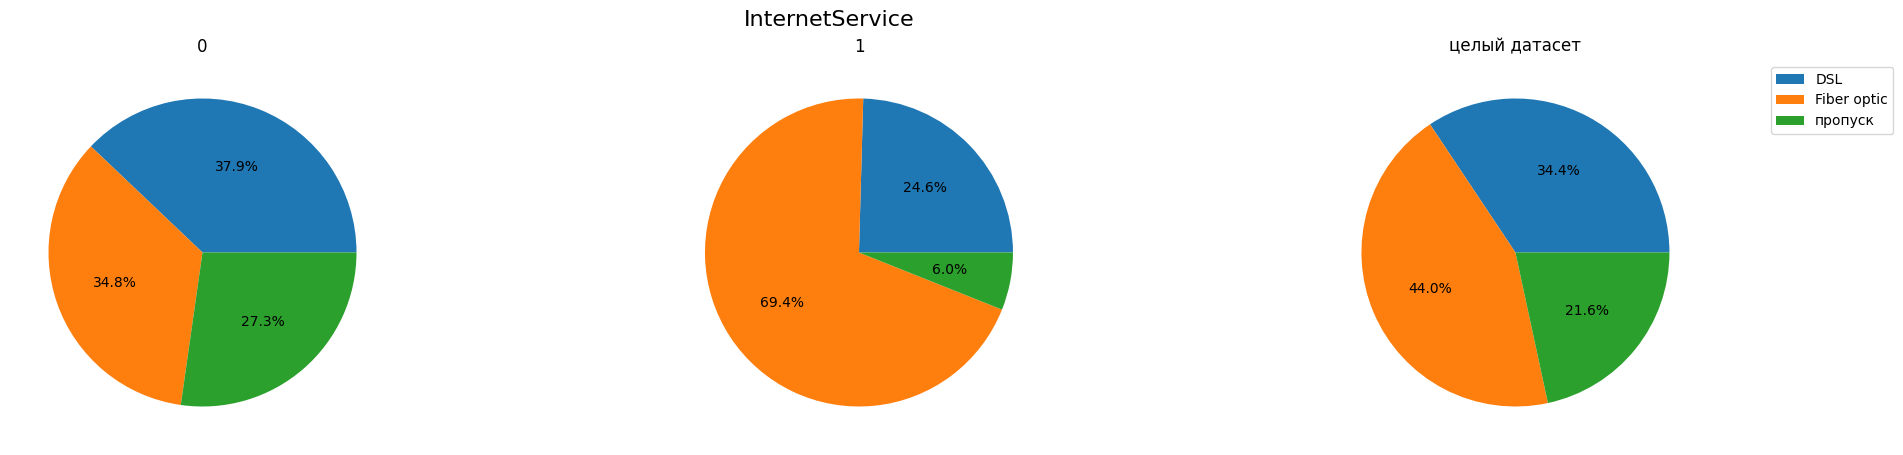

In [52]:
plot_pies(data, 'InternetService', 'target')

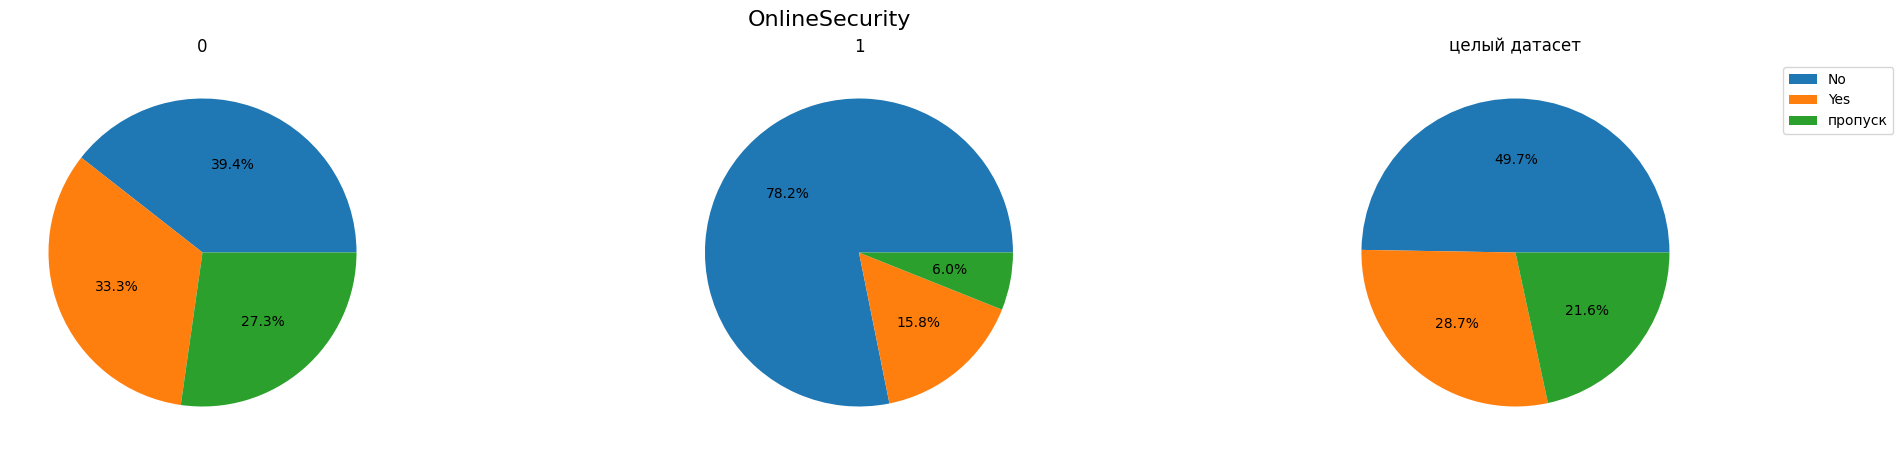

In [53]:
plot_pies(data, 'OnlineSecurity', 'target')

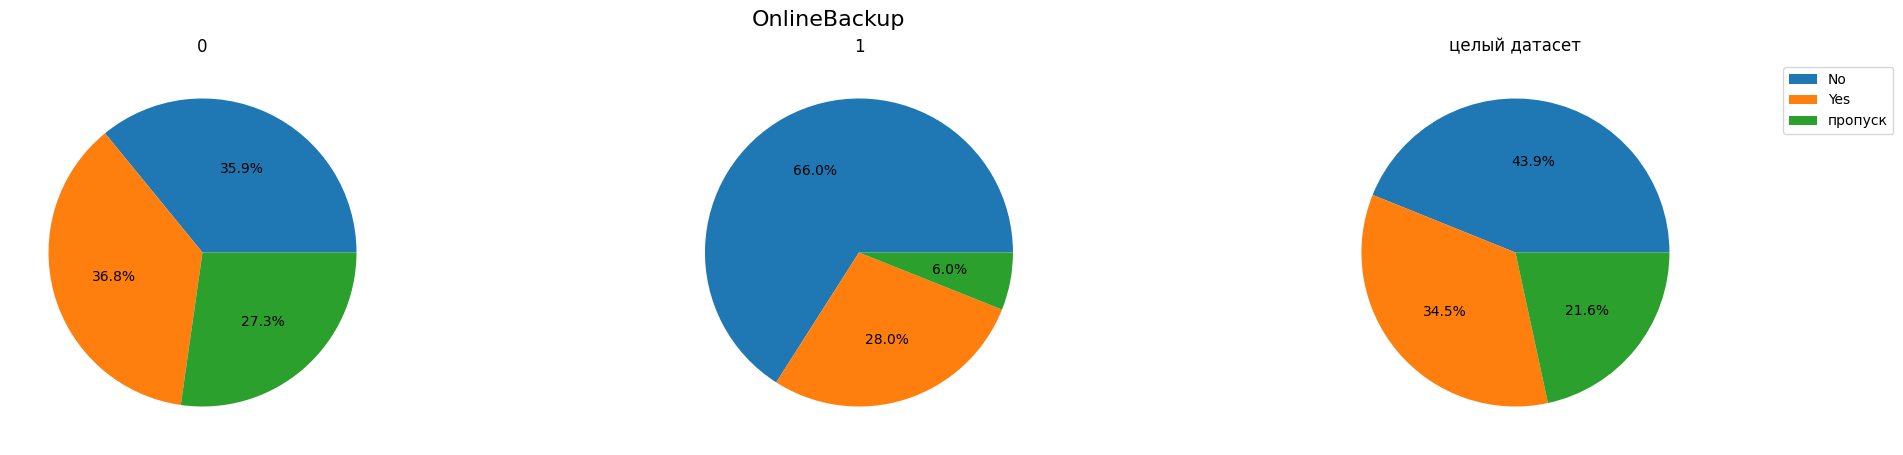

In [54]:
plot_pies(data, 'OnlineBackup', 'target')

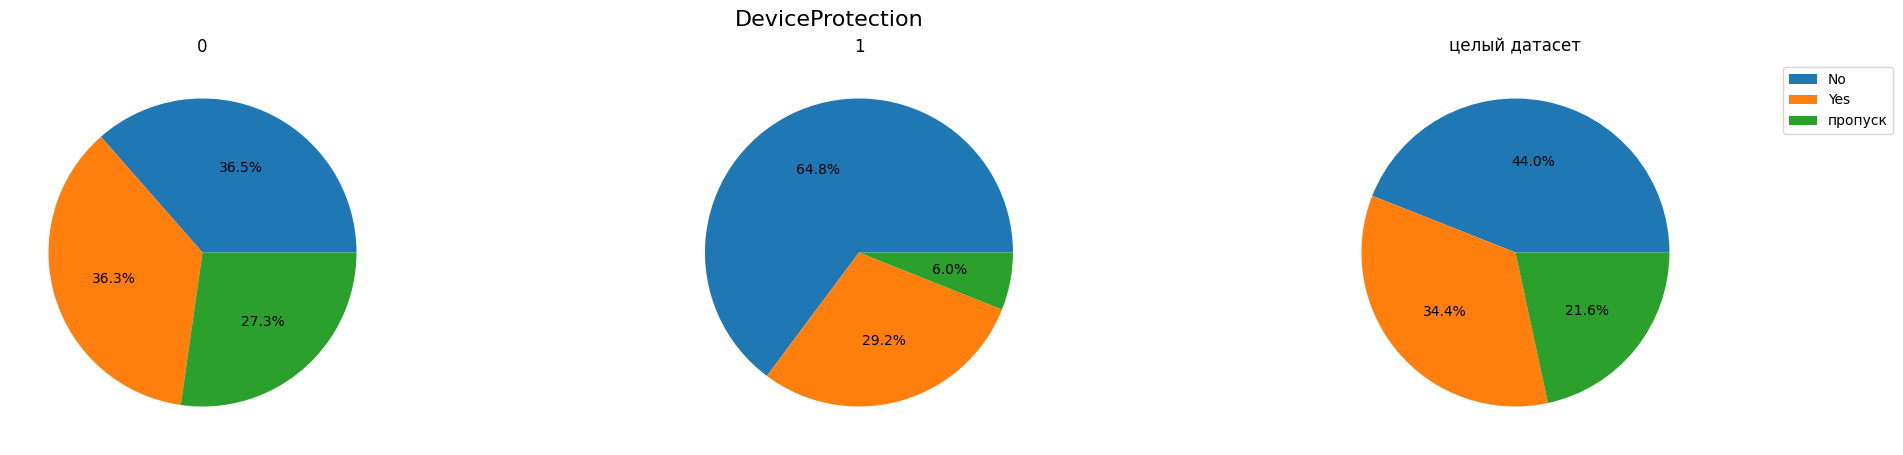

In [55]:
plot_pies(data, 'DeviceProtection', 'target')

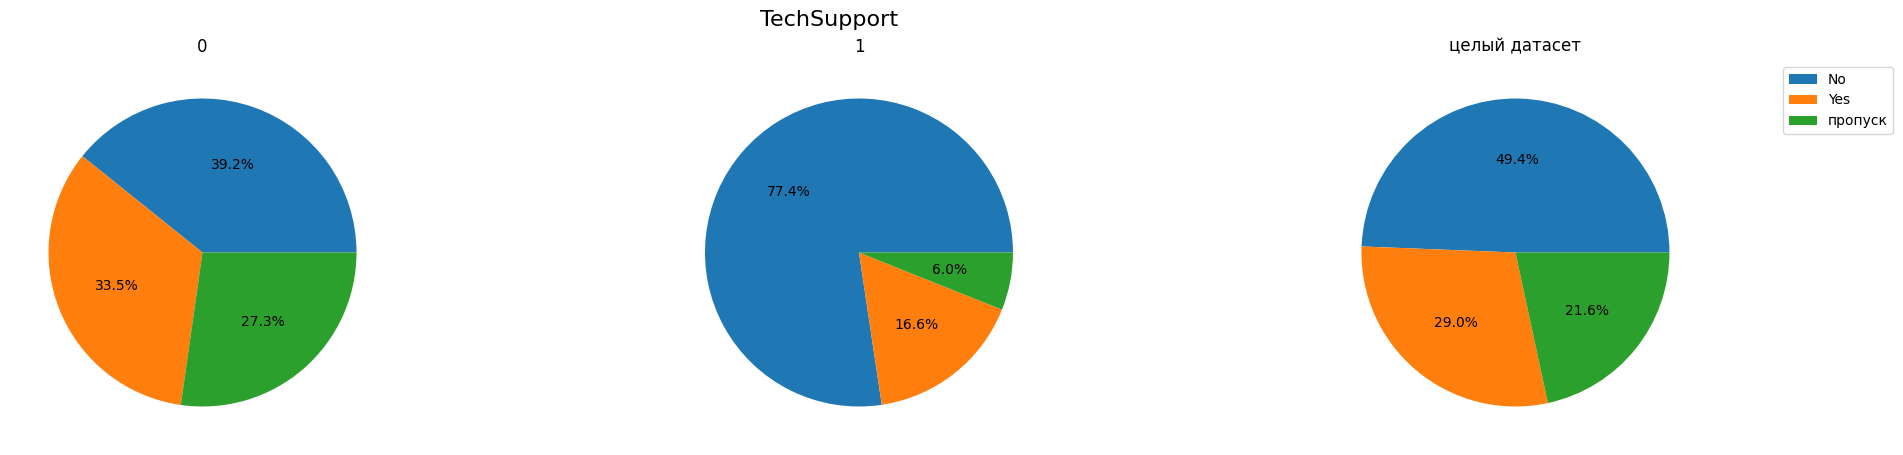

In [56]:
plot_pies(data, 'TechSupport', 'target')

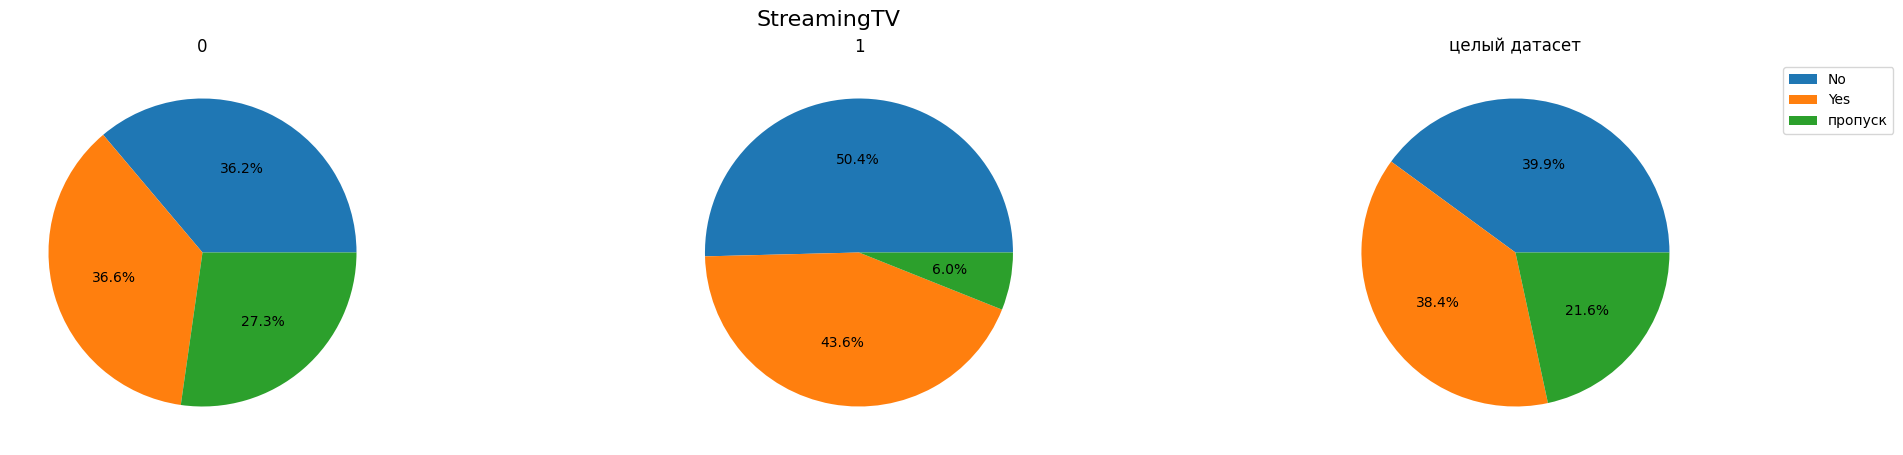

In [57]:
plot_pies(data, 'StreamingTV', 'target')

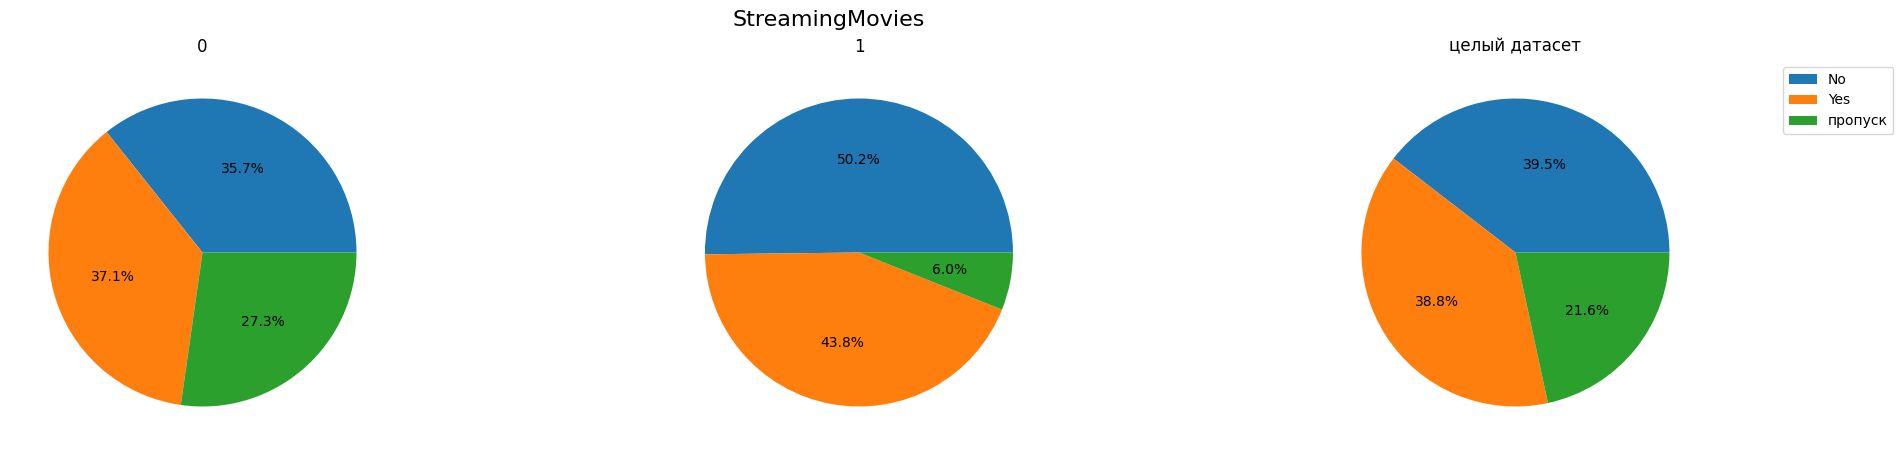

In [58]:
plot_pies(data, 'StreamingMovies', 'target')

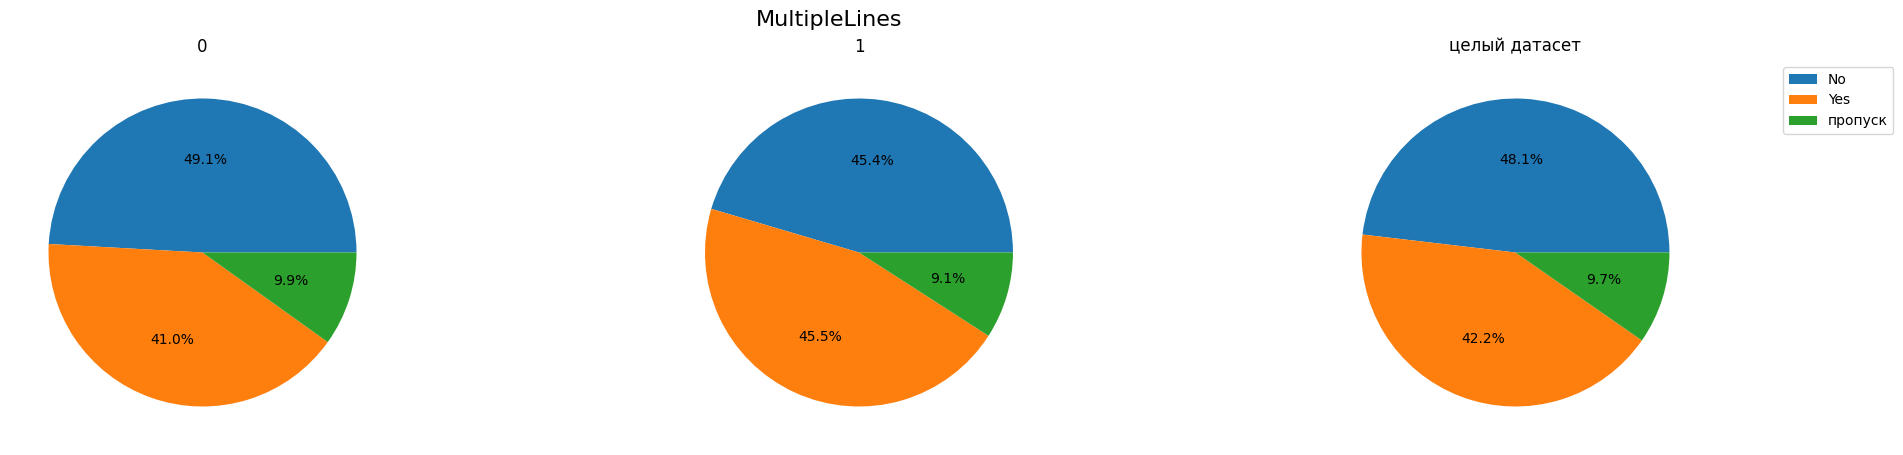

In [59]:
plot_pies(data, 'MultipleLines', 'target')

<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>отличный анализ по графикам, но очень не хватает вывода - что из них слдеует? Можно ли выделить портрет уходящего клиента?
    
----
    
Совсем не нашла анализ корреляций, нужно добавить. 
    
По корреляциям советую почитать <a href='https://github.com/hukenovs/coursera_ml_da_specialization/blob/master/C4_Stats_for_data_analysis/Lectures/3-2.Korrelyacii.pdf'>конспект из специализации Яндекса и МФТИ с Coursera</a>. 
Для числовых признаков - можно смотреть обычную корреляцию Пирсона.
        
Для бинарных признаков есть коэффициент фи, как мера связи двух бинарных переменных, <a href='https://en.wikipedia.org/wiki/Phi_coefficient'>про него здесь</a>.
        
Можно также посмотреть фи-корреляцию для смешанного набора признаков, <a href='
https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7#:~:text=Phik%20(%F0%9D%9C%99k)%20is%20a%20new,a%20bivariate%20normal%20input%20distribution'>про него здесь</a>.
        
Но проще использовать библиотеку Phik - она позволяет легко рассчитать корреляцию и числовых и бинарных и категориальных признаков, <a href='https://pypi.org/project/phik/'>советую использовать этот модуль</a>.

<div class="alert" style="background-color: #ead7f7; color: #8737bf">
<font size="3"><b>Комментарий студента</b></font>
    
Добавил вывод
    
---
    
Я пытался разобраться с Phik. Читал их туториалы, но никак не могу понять, как её использовать
</div>

__Выводы:__

- Уходящих клиентов примерно в 3 раза меньше, чем оставшихся
- Распределение ежемесячных трат у уходящих клиентов сильно сдвинуто в большую сторону по сравнеию с остающимися
- Если клиент уходит, то обычно в первые месяцы обслуживания
- Уходящие клиенты чаще запрашивают чеки на электронную почту
- Уходящие клиенты чаще расплачиваются электронными чеками
- Среди уходящих клиентов пенсионеры встречаются в 2 раза чаще
- Среди уходящих клиентов имеющие еждевенцов встречаются в 2 раза чаще
- Если уходящий клиент подписывается на интернет, то он скорее всего подключается через оптоволокно
- Уходящий клиент в основном отказывается от доп услуг для интернета

### Моделирование

#### Train/Val//Test разбивка

In [60]:
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    random_state=RANDOM_STATE,
)

#### LightGBM

In [61]:
def objective(trial):
    lgbm_model = lightgbm.LGBMClassifier(
        objective='binary',
        boosting_type=trial.suggest_categorical('boosting_type', ['dart', 'gbdt', 'rf']),
        subsample=trial.suggest_float('subsample', .05, 1.,),
        subsample_freq=trial.suggest_int('subsample_freq', 2, 4),
        n_estimators=trial.suggest_int('n_estimators', 10, 300),
        learning_rate=trial.suggest_float('learning_rate', .05, 1., log=True),
        num_leaves=trial.suggest_int('num_leaves', 2, 16),
        max_depth=trial.suggest_int('max_depth', 1, 8),
        colsample_bytree=trial.suggest_float('colsample_bytree', .05, 1.),
        reg_alpha=trial.suggest_float('reg_alpha', .5, 5),
        reg_lambda=trial.suggest_float('reg_lambda', .5, 5),
        is_unbalance=True,
        random_state=RANDOM_STATE,
    )

    sss = StratifiedShuffleSplit(n_splits=5, test_size=.25, random_state=RANDOM_STATE)
    auc_scores = np.zeros(5)
    for i, (t, v) in enumerate(sss.split(X_train, y_train)):
        train_X = X_train.iloc[t]
        train_y = y_train.iloc[t]

        val_X = X_train.iloc[v]
        val_y = y_train.iloc[v]

        lgbm_model.fit(train_X, train_y)
        y_proba = lgbm_model.predict_proba(val_X)[:, 1]
        auc_scores[i] = roc_auc_score(val_y, y_proba)

    return auc_scores.mean()

In [62]:
study = optuna.create_study(direction='maximize', study_name='lgbm_optuna')

In [63]:
%%time
study.optimize(objective, n_trials=100, n_jobs=-1)

CPU times: total: 3min 33s
Wall time: 1min 32s


In [64]:
trial = study.best_trial
print('Лучшие гиперпараметры:')
for param, value in trial.params.items():
    print(f'* {param}: {value}')
print(f'Лучший AUC: {trial.value}')

Лучшие гиперпараметры:
* boosting_type: gbdt
* subsample: 0.9978824558782687
* subsample_freq: 3
* n_estimators: 273
* learning_rate: 0.2026612119067706
* num_leaves: 13
* max_depth: 7
* colsample_bytree: 0.4584409946019152
* reg_alpha: 3.0985395943276726
* reg_lambda: 1.0155314336849834
Лучший AUC: 0.8971692448965177


<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хорошо, плюс за optuna

#### CatBoost

In [65]:
def objective(trial):
    catboost_model = catboost.CatBoostClassifier(
        # objective='binary',
        # boosting_type=trial.suggest_categorical('boosting_type', ['dart', 'gbdt', 'rf']),
        subsample=trial.suggest_float('subsample', .05, 1.,),
        # sampling_frequency=trial.suggest_int('sampling_frequency', 2, 4),
        n_estimators=trial.suggest_int('n_estimators', 10, 300),
        learning_rate=trial.suggest_float('learning_rate', .05, 1., log=True),
        # num_leaves=trial.suggest_int('num_leaves', 2, 16),
        max_depth=trial.suggest_int('max_depth', 1, 8),
        # colsample_bytree=trial.suggest_float('colsample_bytree', .05, 1.),
        # reg_alpha=trial.suggest_float('reg_alpha', .5, 5),
        reg_lambda=trial.suggest_float('reg_lambda', .5, 5),
        auto_class_weights='Balanced',
        verbose=0,
        random_state=RANDOM_STATE,
    )

    sss = StratifiedShuffleSplit(n_splits=5, test_size=.25, random_state=RANDOM_STATE)
    auc_scores = np.zeros(5)
    for i, (t, v) in enumerate(sss.split(X_train, y_train)):
        train_X = X_train.iloc[t]
        train_y = y_train.iloc[t]

        val_X = X_train.iloc[v]
        val_y = y_train.iloc[v]

        catboost_model.fit(train_X, train_y, cat_features=train_X.select_dtypes('category').columns.to_list())
        y_proba = catboost_model.predict_proba(val_X)[:, 1]
        auc_scores[i] = roc_auc_score(val_y, y_proba)

    return auc_scores.mean()

In [66]:
study = optuna.create_study(direction='maximize', study_name='catboost_optuna')

In [67]:
%%time
study.optimize(objective, n_trials=100, n_jobs=-1)

CPU times: total: 1h 5min 8s
Wall time: 25min 35s


In [68]:
trial = study.best_trial
print('Лучшие гиперпараметры:')
for param, value in trial.params.items():
    print(f'* {param}: {value}')
print(f'Лучший AUC: {trial.value}')

Лучшие гиперпараметры:
* subsample: 0.7688013400072023
* n_estimators: 245
* learning_rate: 0.39707375590521904
* max_depth: 3
* reg_lambda: 0.5892176611202525
Лучший AUC: 0.9172529490711309


### Тестирование

In [69]:
# refit
catboost_model = catboost.CatBoostClassifier(
    # objective='binary',
    # boosting_type=trial.params['boosting_type'],
    subsample=trial.params['subsample'],
    # sampling_frequency=trial.params['sampling_frequency'],
    n_estimators=trial.params['n_estimators'],
    learning_rate=trial.params['learning_rate'],
    # num_leaves=trial.params['num_leaves'],
    max_depth=trial.params['max_depth'],
    # colsample_bytree=trial.params['colsample_bytree'],
    # reg_alpha=trial.params['reg_alpha'],
    reg_lambda=trial.params['reg_lambda'],
    auto_class_weights='Balanced',
    verbose=0,
    random_state=RANDOM_STATE,
)
catboost_model = catboost_model.fit(X_train, y_train, cat_features=X_train.select_dtypes('category').columns.to_list())

In [70]:
y_pred = catboost_model.predict(X_test)
y_proba = catboost_model.predict_proba(X_test)[:, 1]

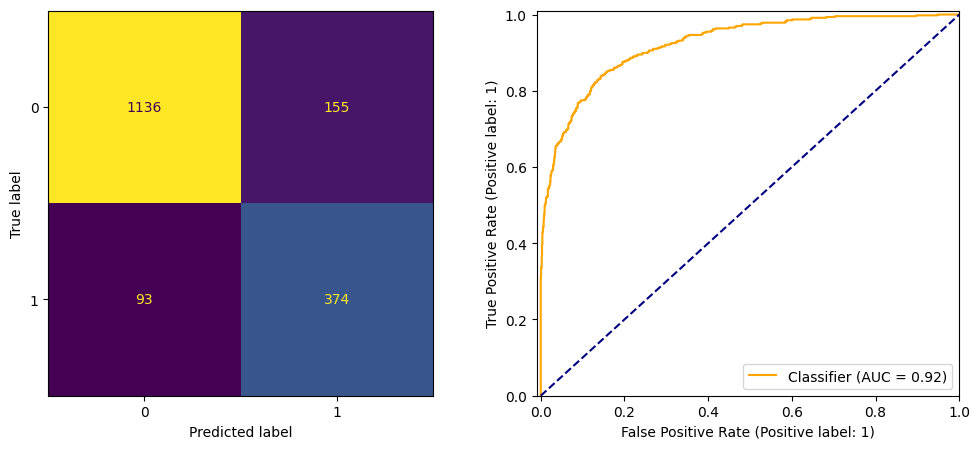

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1291
           1       0.71      0.80      0.75       467

    accuracy                           0.86      1758
   macro avg       0.82      0.84      0.83      1758
weighted avg       0.87      0.86      0.86      1758



In [71]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    ax=axes[0],
    colorbar=False,
)

RocCurveDisplay.from_predictions(
    y_test, y_proba,
    ax=axes[1],
    color='orange',
)
axes[1].plot([0, 1], [0, 1], color='navy', linestyle='--')
axes[1].set_ylim(0, 1.01)
axes[1].set_xlim(-0.01, 1)

plt.show()

print(classification_report(y_test, y_pred))

<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> хорошо бы еще добавить анализ значимости признаков, понять на основе чего модель строит прогнозы и есть ли незначимые признаки, https://newtechaudit.ru/feature-importance-v-sklearn-i-catboost-na-primere-klassicheskih-datasetov/

### Анализ признаков

In [74]:
explainer = shap.TreeExplainer(catboost_model)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


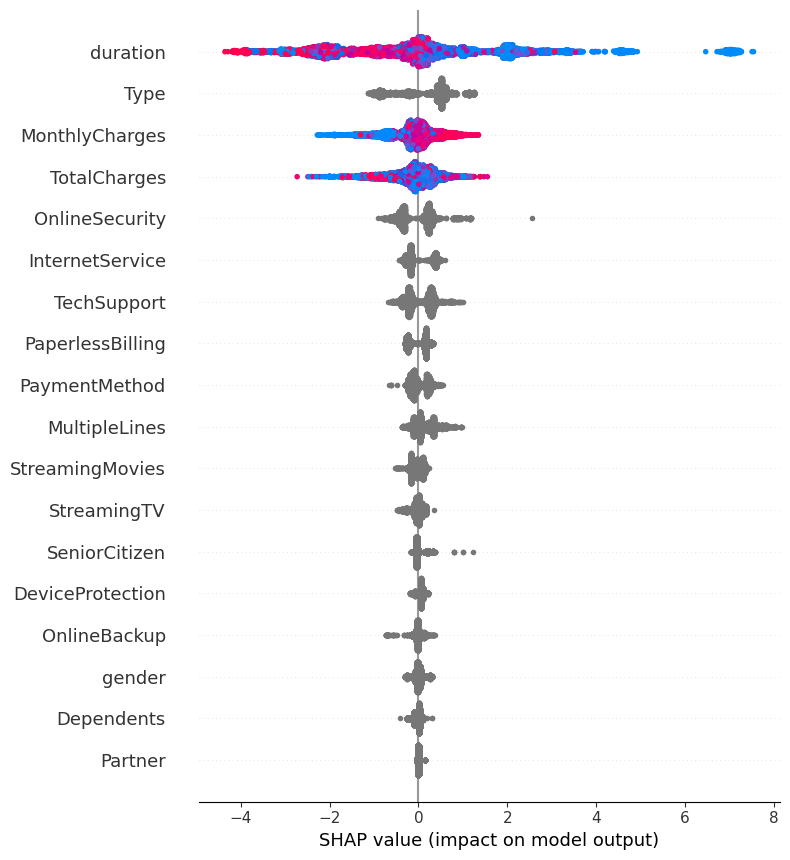

In [75]:
shap.summary_plot(
    shap_values=shap_values,
    features=X,
    class_names=[0, 1],
    max_display=100,
    color_bar=False,
)

# Вопросы

- Для CV я использую [StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html). Мне кажется очень классной идеей использовать перемешивание и стратификацию при разделении. Однако у StratifiedShuffleSplit нет параметра, отвечающего за стратификацию. Я тут всё нормально делаю?
- У CatBoost не нашёл аналога параметра colsample_bytree(sub_feature, feature_fraction)
- У CatBoost не нашёл аналога параметра reg_alpha(lambda_l1, l1_regularization)

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
1) Да, все корректно, внутри Stratified нет стратификации.

2) аналогичный параметр - rsm     
    
3) ипользуется l2 регуляриазция, параметр reg_lambda (подробнее про параметры - https://catboost.ai/en/docs/references/training-parameters/common#sampling_unit)

<div style="border:solid Chocolate 2px; padding: 40px">

<h2>✔️ Заключение тимлида: <a class="tocSkip"> </h2> 
    
<b>Михаил</b>, работа почти готова, но нужно еще немного дорабоать, мои комментарии ты увидишь выше.

Жду твою работу! :)

## Отчёт

- Ответы на вопросы задания:
   - Какие пункты плана были выполнены, а какие — нет. Почему?  
   Да в общем то все пункты составленного плана были выполнены
   - Какие трудности возникли и как вы их преодолели?  
   Были найдены примеры, для которых невозможно было вывести целевой признак. Мы их удалили из датасета.
   - Какие ключевые шаги в решении задачи вы выделили?  
   Ключевые шаги выделены в плане
   - Какие признаки использовали для обучения модели и какая предобработка этих признаков была выполнена?  
   Мы сгенерировали новый признак длительности контракта. И использовали все остальные признаки кроме дат.
   - Какая ваша итоговая модель, какие у неё гиперпараметы и какое качество?  
   На этапе кросс-валидации была выбрана модель градиентного бустинга CatBoost с гиперпараметрами (subsample: 0.7688013400072023, n_estimators: 245, learning_rate: 0.39707375590521904, max_depth: 3, reg_lambda: 0.5892176611202525). Модель на тестовых данных показала `AUC = 0.92`, `F1=0.83` и `accuracy = 0.86`
- Перечисление признаков, использованных для обучения (в порядке уменьшения их значимости)
   * duration (сгенерированный признак)
   * Type
   * MonthlyCharges
   * TotalCharges
   * OnlineSecurity
   * InternetService
   * TechSupport
   * PaperlessBilling
   * PaymentMethod
   * MultipleLines
   * StreamingMovies
   * StreamingTV
   * SeniorSitizen
   * DeviceProtection
   * OnlineBackup
   * gender
   * Dependents
   * Partner  
   Для всех категориальных признаков пропуски были заменены на значение "пропуск"
- Лучшая модель и её гиперпараметры  
(Указаны выше)
- Сводная таблица всех моделей и их оценки на кросс-валидации

| Модель   | ROC-AUC            |
|----------|--------------------|
| LightGBM | 0.8971692448965177 |
| CatBoost | 0.9172529490711309 |

- График важности признаков и выводы по нему  
(Сам график показан выше)
Наибольшую важность для модели имеет признак duration. Также хотелось бы отметить значимость следующих за ним четырёх признаков: Type, MonthlyCharges, TotalCharges, OnlineSecurity. Остальные признаки менее значимы для модели

Есть несколько идей для дальнейшего улучшения модели:
- `feature selection`, например через rfecvSHAP
- добавление новых гиперпараметров в поиск
- генерация новых признаков, например из дат день недели и проч.

<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> отчет должен быть такой, чтобы по данным и отчету можно было воспроизвести результаты. Про то, что должно быть в отчете подробнее написано в презентации в Пачке.

Добавь пожалуйста ответы на вопросы из трекера:

* Какие трудности возникли и как вы их преодолели? 

* Какие признаки значимы для модели?

<div style="border:solid Chocolate 2px; padding: 40px">

<h2>✔️ Финальное заключение тимлида: <a class="tocSkip"> </h2> 
    
<b>Михаил</b>, с отчетом теперь все хорошо! Работа получилась большой и полной, молодец! 
    
Поздравляю с получением диплома о новой специальности!!!!<br> 
    
Немного фидбека о твоей работе:
- доработки не только ошибок, но и рекомендации, что отражает качественный подход к работе;
- легкочитаемый код - он понятен, с пояснениями и отступами, молодец;
- использование кросс-валидации и нескольких моделей обучения - супер;
- хорошая аналитическая часть.
    
Рекомендую доразобрать с Phik, тогда проанализируем все корреляции, что важно.
    
Сейчас ты можешь доработать этот проект с учетом рекомендаций, удалить наши с тобой комментарии и добавить себе в портфолио — лучше это сделать в ближайшее время, пока все нюансы еще отложились в памяти.

Далее, хочу добавить некоторые ссылки на полезные ресурсы по машинному обучению:

https://academy.yandex.ru/handbook/ml/ онлайн-учебник от Школы анализа данных Яндекса, в котором описаны теоретические основы работы моделей машинного обучения;

https://www.youtube.com/watch?v=xl1fwCza9C8 познавательное видео по настройке модели CatBoost

https://habr.com/ru/company/ods/blog/322626/ на Habr можно закрепить свои знания, порешав задачи из цикла статей — Открытый курс машинного обучения

https://github.com/esokolov/ml-course-hse — на гитхаб есть репозиторий с задачами из курса по машинному обучению от Евгения Соколова, можно использовать как дополнительный материал для закрепления знаний.

https://habr.com/ru/company/avito/blog/571094/ — материалы по A/B тестам.

В некоторых компаниях при устройстве на работу или стажировку, например в Яндексе, нужно решить тест на алгоритмические задачи. По алгоритмам есть много разных курсов, платных и бесплатных. Можно попробовать Тренировки по Алгоритмам от Яндекса https://yandex.ru/yaintern/algorithm-training (бесплатно, хороший курс). Насколько знаю, у Практикума тоже есть курс по алгоритмам.
    
***
    
После окончания финального спринта у нас будет заключительная консультация, где мы сможем подвести итоги и обсудить несколько проектов. Есть возможность выступить перед сокурсиниками со своим проектам в zoom, напиши мне об этом в Пачку, если есть желание :)
    
Отчет принимаю и до встречи!
    
    
</font>